## Calculating the Covariance Matrix

This step contains the calculation of the Covariance AMtrix

In [12]:
import numpy as np
soi1_theta = 15 / 180 * np.pi #convert to radins
soi2_theta = 60 / 180 * np.pi

#LCVM weights
R_int = np.linalg.pinv(np.cov(X)) #8x8
s1 = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(soi1_theta)).reshape(-1,1)
s2 = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(soi2_theta)).reshape(-1,1)
C = np.concatenate((s1,s2), axis = 1) #8x2
f = np.ones(2).reshape(-1,1) #2x1

#LCMV equation
#    8x8   8x2               2x8             8x8   8x2  2x1 
w = R_inv @ C @ np.linalg.pinv(C.conj().T @ R_inv @ C) @ f # output is 8x1

# Incoming Signal

In [5]:
##Received Signal
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 1e6
N = 10000 # number of samples to simulate

#Create a tone to act as the transmitter signal
t = np.arange(N)/sample_rate #time vector
f_tone = 0.02e6
tx = np.exp(2j*np.pi*f_tone*t)

d = 0.5 #half wavelength spacing
Nr = 3
theta_degrees  = 20 # direction of arrival
theta = theta_degrees / 180 *np.pi #radians conversion
s = np.exp(-2j*np.pi * d * np.arange(Nr)*np.sin(theta)) # Steering vector

#Making s a column vector
s = s.reshape(-1,1)
print(s.shape) #3x1

#Making TX a row vector
tx = tx.reshape(1,-1)
print(tx.shape)

#Simulate the received signal X through a matrix multiply
X = s@ tx

(3, 1)
(1, 10000)


In [7]:
R = (X @ X.conj().T)/X.shape[1]

In [14]:
R_inv = np.linalg.pinv(R)

In [15]:
w

array([[-1.0137021 -1.67016822j],
       [ 1.44159707-2.66213711j],
       [ 2.49918609+0.77364519j]])

In [17]:
#utilizing in the context of DOA
#1000 different thetas between -180 and 180 degrees
r = X #received signal
theta_scan = np.linspace(-1*np.pi, np.pi, 1000)

results = []
for theta_i in theta_scan:
    w = w #3x1
    X_weighted = w.conj().T @X #apply weights
    power_dB = 10*np.log10(np.var(X_weighted)) #power in signal, in dB
    results.append(power_dB)
results -= np.max(results) #normalize

# Generating the plot

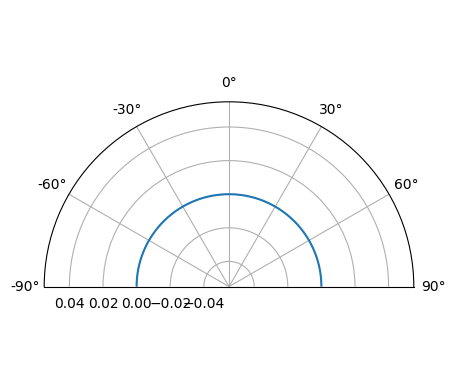

In [18]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta_scan, results) # MAKE SURE TO USE RADIAN FOR POLAR
ax.set_theta_zero_location('N') # make 0 degrees point up
ax.set_theta_direction(-1) # increase clockwise
ax.set_rlabel_position(55)  # Move grid labels away from other labels
ax.set_thetamin(-90) # only show top half
ax.set_thetamax(90)
#ax.set_theta_direction(-1) # increase clockwise
ax.set_rlabel_position(55)  # Move grid labels away from other labels
plt.show()

## Applying the Covariance Matrix in the previous Code

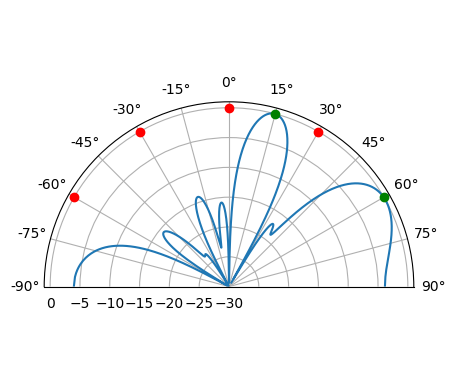

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Simulate received signal
Nr = 8 # 8 elements
theta1 = -60 / 180 * np.pi # convert to radians
theta2 = -30 / 180 * np.pi
theta3 = 0 / 180 * np.pi
theta4 = 30 / 180 * np.pi
s1 = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta1)).reshape(-1,1) # 8x1
s2 = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta2)).reshape(-1,1)
s3 = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta3)).reshape(-1,1)
s4 = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta4)).reshape(-1,1)
# we'll use 3 different frequencies.  1xN
tone1 = np.exp(2j*np.pi*0.01e6*t).reshape(1,-1)
tone2 = np.exp(2j*np.pi*0.02e6*t).reshape(1,-1)
tone3 = np.exp(2j*np.pi*0.03e6*t).reshape(1,-1)
tone4 = np.exp(2j*np.pi*0.04e6*t).reshape(1,-1)
X = s1 @ tone1 + s2 @ tone2 + s3 @ tone3 + s4 @ tone4
n = np.random.randn(Nr, N) + 1j*np.random.randn(Nr, N)
X = X + 0.5*n # 8xN

# Let's point at the SOI at 15 deg, and another potential SOI that we didn't actually simulate at 60 deg
soi1_theta = 15 / 180 * np.pi # convert to radians
soi2_theta = 60 / 180 * np.pi

# LCMV weights
R_inv = np.linalg.pinv(np.cov(X)) # 8x8
s1 = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(soi1_theta)).reshape(-1,1) # 8x1
s2 = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(soi2_theta)).reshape(-1,1) # 8x1
C = np.concatenate((s1, s2), axis=1) # 8x2
f = np.ones(2).reshape(-1,1) # 2x1

# LCMV equation
#    8x8   8x2                    2x8        8x8   8x2  2x1
w = R_inv @ C @ np.linalg.pinv(C.conj().T @ R_inv @ C) @ f # output is 8x1

# Plot beam pattern
w = w.squeeze() # reduce to a 1D array
N_fft = 1024
w = np.conj(w) # or else our answer will be negative/inverted
w_padded = np.concatenate((w, np.zeros(N_fft - Nr))) # zero pad to N_fft elements to get more resolution in the FFT
w_fft_dB = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(w_padded)))**2) # magnitude of fft in dB
w_fft_dB -= np.max(w_fft_dB) # normalize to 0 dB at peak
theta_bins = np.arcsin(np.linspace(-1, 1, N_fft)) # Map the FFT bins to angles in radians

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta_bins, w_fft_dB) # MAKE SURE TO USE RADIAN FOR POLAR
# Add dots where interferers and SOIs are
ax.plot([theta1], [0], 'or')
ax.plot([theta2], [0], 'or')
ax.plot([theta3], [0], 'or')
ax.plot([theta4], [0], 'or')
ax.plot([soi1_theta], [0], 'og')
ax.plot([soi2_theta], [0], 'og')
ax.set_theta_zero_location('N') # make 0 degrees point up
ax.set_theta_direction(-1) # increase clockwise
ax.set_thetagrids(np.arange(-90, 105, 15)) # it's in degrees
ax.set_rlabel_position(55)  # Move grid labels away from other labels
ax.set_thetamin(-90) # only show top half
ax.set_thetamax(90)
ax.set_ylim([-30, 1]) # because there's no noise, only go down 30 dB
plt.show()


In [20]:
a = [1, 2, 3]
b = np.array(a).reshape(-1,1)
b

array([[1],
       [2],
       [3]])